# Projeto de Extração de Dados a partir das API's do IPEA e IBGE

## Objetivo

O objetivo deste projeto é que os alunos, trabalhando em grupos, demonstrem a capacidade de construir um pipeline de extração, transformação e carga(ETL) ou extração, carga e transformação (ELT) completo, desde a obtenção dos dados até a geração de um arquivo final em formato **Parquet**.

Realização de um ETL - Extract, Transform, Load. que consiste em:
  * Extract: Reunir os dados das API's.
  * Transform: Fazer as conversões e limpeza.
  * Load: Salvar os Dados consolidados em um banco de dados, ou warehouse para que possam ser consultados e analisados.



### Tema escolhido:
Catalogar a série histórica de feminicídios no Brasil.

Fontes: 
* [IPEA - Instituto de Pesquisa Econômica Aplicada](http://www.ipeadata.gov.br)
* [IBGE - Instituto Brasileiro de Geografia e Estatística](https://www.ibge.gov.br/)

## Sobre as API's
### IPEA
O site do IPEA disponibiliza uma biblioteca Python que ajuda nas requisições da API, e possui um repositório no [GitHub](https://github.com/luanborelli/ipeadatapy/) com sua documentação. É através dela que extraímos os dados sobre feminicídio.

### IBGE
O IBGE também disponibiliza uma [API](https://servicodados.ibge.gov.br/api/docs/localidades) para consultas de código de região onde utilizamos para melhor idêntificação dos territórios, já que a API do IPEA identifica apenas por código de território. 


## EXTRACT


In [2]:
#Instalação da biblioteca disponibilizada pelo site do IPEA.
!pip install ipeadatapy


In [3]:
import requests 
import ipeadatapy as ipea
import pandas as pd
import json

In [8]:
# Fazendo a requisição na API

#url_ipea = 'http://www.ipeadata.gov.br/api/odata4/'
url_ibge_municipios = 'https://servicodados.ibge.gov.br/api/v1/localidades/municipios'
url_ibge_estados = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados/'

#resp_ipea = requests.get(url_ipea)
resp_ibge_municipios = requests.get(url_ibge_municipios)
resp_ibge_estados = requests.get(url_ibge_estados)

print(f'{resp_ibge_estados}\n{resp_ibge_municipios}')


<Response [200]>
<Response [200]>


In [15]:
# Atribuindo as respostas dos requests a variáveis
ibge_data_municipios = resp_ibge_municipios.json()
ibge_data_estados = resp_ibge_estados.json()

### Utilizando o  Ipea Data


In [10]:
# Atribuindo a lista das séries disponíveis a uma variável.
series_ipea = ipea.list_series()
series_ipea

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABQUBO12,Abate - bois - quantidade
3,ABATE12_ABQUBV12,Abate - bovinos - quantidade
4,ABATE12_ABQUFR12,Abate - frangos - quantidade
...,...,...
3492,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
3493,PNAD_IAGRV,Domicílios com insegurança alimentar grave
3494,PNAD_IALEV,Domicílios com insegurança alimentar leve
3495,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


### Fazendo a busca na série através do tema escolhido 

In [30]:
# 1359	HOMICF	Número de homicídios do sexo feminino

buscar = 'homicídio'
series_ipea[ series_ipea['NAME'].str.contains(buscar, case=False, na=False)]

,CODE,NAME
1358,HOMIC,Número de homicídios
1359,HOMICF,Número de homicídios do sexo feminino
1360,HOMICFJ,Número de homicídios de jovens de 15 a 29 anos...
1361,HOMICJ,Número de homicídios de jovens de 15 a 29 anos
1362,HOMICM,Número de homicídios do sexo masculino
1363,HOMICMJ,Número de homicídios de jovens de 15 a 29 anos...
1370,PHOMIC,Proporção de homicídios como causa de mortalidade
1371,PHOMICF,Proporção de homicídios como causa de mortalid...
1372,PHOMICFJ,Proporção de homicídios como causa de mortalid...
1373,PHOMICJ,Proporção de homicídios como causa de mortalid...


In [42]:
# construindo o dataframe com o método da biblioteca do ipea passando o códico da série.
# A biblioteca do IPEA já trás o resultado como um DataFrame Pandas

df_ipea = ipea.timeseries('HOMICF').reset_index()
df_ipea.head()

,DATE,CODE,RAW DATE,TERCODIGO,YEAR,NIVNOME,VALUE (Unidade)
0,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,15AMC1872_1997004,1980,AMC 1872-00,1.0
1,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,15AMC1872_1997008,1980,AMC 1872-00,1.0
2,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,21AMC1872_1997011,1980,AMC 1872-00,1.0
3,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,23AMC1872_1997002,1980,AMC 1872-00,1.0
4,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,23AMC1872_1997003,1980,AMC 1872-00,1.0


### Limpeza
Verificando dados nulos

In [80]:
# Limpeza
df_ipea.isna().sum()

datetime               0
cod_territorial        0
ano                    0
regiao                 0
vitimas(quantidade)    0
dtype: int64

In [81]:
df_ipea.isnull().sum()

datetime               0
cod_territorial        0
ano                    0
regiao                 0
vitimas(quantidade)    0
dtype: int64

In [51]:
# construindo os dataframes do IBGE

ibge_municipios = pd.DataFrame(ibge_data_municipios)
ibge_estados = pd.DataFrame(ibge_data_estados)

In [82]:
ibge_municipios.isnull().sum()

cod_territorial    0
municipio          0
dtype: int64

In [83]:
ibge_municipios.isna().sum()

cod_territorial    0
municipio          0
dtype: int64

In [85]:
ibge_estados.isna().sum()

cod_territorial    0
sigle              0
nome               0
dtype: int64

In [86]:
ibge_estados.isnull().sum()

cod_territorial    0
sigle              0
nome               0
dtype: int64

## Transform

In [46]:
# Excluindo as colunas que não serão utilizadas
df_ipea.keys() # Index(['DATE', 'CODE', 'RAW DATE', 'TERCODIGO', 'YEAR', 'NIVNOME','VALUE (Unidade)'],dtype='object')
excluir = ['DATE', 'CODE']
df_ipea.drop(columns=excluir, inplace=True) 

#Renomeando as colunas
novos = ['datetime', 'cod_territorial', 'ano', 'regiao', 'vitimas(quantidade)']
df_ipea.columns = novos
df_ipea

,datetime,cod_territorial,ano,regiao,vitimas(quantidade)
0,1980-01-01T00:00:00-02:00,15AMC1872_1997004,1980,AMC 1872-00,1.0
1,1980-01-01T00:00:00-02:00,15AMC1872_1997008,1980,AMC 1872-00,1.0
2,1980-01-01T00:00:00-02:00,21AMC1872_1997011,1980,AMC 1872-00,1.0
3,1980-01-01T00:00:00-02:00,23AMC1872_1997002,1980,AMC 1872-00,1.0
4,1980-01-01T00:00:00-02:00,23AMC1872_1997003,1980,AMC 1872-00,1.0
...,...,...,...,...,...
137857,2022-01-01T00:00:00-03:00,1,2022,Regiões,476.0
137858,2022-01-01T00:00:00-03:00,4,2022,Regiões,581.0
137859,2022-01-01T00:00:00-03:00,3,2022,Regiões,990.0
137860,2022-01-01T00:00:00-03:00,2,2022,Regiões,1373.0


In [52]:
# Dropando colunas que não serão utilizadas

ibge_municipios = ibge_municipios.drop(columns=['microrregiao', 'regiao-imediata'])

# Renomeando colunas
novos = ['cod_territorial', 'municipio']
ibge_municipios.columns = novos
ibge_municipios

,cod_territorial,municipio
0,1100015,Alta Floresta D'Oeste
1,1100023,Ariquemes
2,1100031,Cabixi
3,1100049,Cacoal
4,1100056,Cerejeiras
...,...,...
5565,5222005,Vianópolis
5566,5222054,Vicentinópolis
5567,5222203,Vila Boa
5568,5222302,Vila Propício


In [99]:
# Dropando colunas que não serão utilizadas

#ibge_estados = ibge_estados.drop(columns=['regiao'])

# Renomeando as colunas
novos = ['cod_territorial', 'sigla', 'estado']
ibge_estados.columns = novos
ibge_estados

,cod_territorial,sigla,estado
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará
5,16,AP,Amapá
6,17,TO,Tocantins
7,21,MA,Maranhão
8,22,PI,Piauí
9,23,CE,Ceará


### Enriquecendo
juntando os dataframes

In [91]:
# Juntar df_ipea + ibge_municipios para obter os nomes das cidades
# as colunas de ambos os dataframes serão convertidas para string

df_ipea['cod_territorial'] = df_ipea['cod_territorial'].astype(str)
ibge_municipios['cod_territorial'] =ibge_municipios['cod_territorial'].astype(str)
ibge_estados['cod_territorial'] =ibge_estados['cod_territorial'].astype(str)


In [97]:
# Primeiro juntando o dataframe do IPEA com o do IBGE municípios
df = pd.merge(df_ipea, ibge_municipios[['cod_territorial', 'municipio']], on= 'cod_territorial', how='left')

In [104]:
# Em seguida, juntando o dataframe resutante do merge passado com o do IBGE estados
df = pd.merge(df, ibge_estados[['cod_territorial', 'sigla', 'estado']], on= 'cod_territorial', how='left')

In [106]:
# Dataframe Final
df.sample(30)

,datetime,cod_territorial,ano,regiao,vitimas(quantidade),municipio,sigla,estado
16885,1985-01-01T00:00:00-02:00,25AMC4097005,1985,AMC 40-00,2.0,NaN,NaN,NaN
54803,1995-01-01T00:00:00-02:00,291460,1995,AMC 91-00,1.0,NaN,NaN,NaN
91030,2002-01-01T00:00:00-02:00,32004,2002,Microrregiões,1.0,NaN,NaN,NaN
131450,2020-01-01T00:00:00-03:00,3552502,2020,Municípios,1.0,Suzano,NaN,NaN
9783,1983-01-01T00:00:00-02:00,24017,1983,Microrregiões,1.0,NaN,NaN,NaN
132652,2020-01-01T00:00:00-03:00,5103403,2020,Municípios,12.0,Cuiabá,NaN,NaN
92351,2002-01-01T00:00:00-02:00,41AMC9197026,2002,AMC 91-00,2.0,NaN,NaN,NaN
23662,1987-01-01T00:00:00-02:00,2510808,1987,Municípios,2.0,Patos,NaN,NaN
64085,1997-01-01T00:00:00-02:00,25AMC6097018,1997,AMC 60-00,1.0,NaN,NaN,NaN
115180,2013-01-01T00:00:00-02:00,1501782,2013,Municípios,1.0,Breu Branco,NaN,NaN


In [109]:
linhas, colunas = df.shape
f'Nº linhas: {linhas} - Nº Colunas: {colunas}'

'Nº linhas: 137862 - Nº Colunas: 8'

Organizando as colunas

In [113]:
ordem = ['ano', 'datetime', 'cod_territorial', 'regiao', 'sigla','estado','municipio', 'vitimas(quantidade)']
df = df[ordem]
df

,ano,datetime,cod_territorial,regiao,sigla,estado,municipio,vitimas(quantidade)
0,1980,1980-01-01T00:00:00-02:00,15AMC1872_1997004,AMC 1872-00,NaN,NaN,NaN,1.0
1,1980,1980-01-01T00:00:00-02:00,15AMC1872_1997008,AMC 1872-00,NaN,NaN,NaN,1.0
2,1980,1980-01-01T00:00:00-02:00,21AMC1872_1997011,AMC 1872-00,NaN,NaN,NaN,1.0
3,1980,1980-01-01T00:00:00-02:00,23AMC1872_1997002,AMC 1872-00,NaN,NaN,NaN,1.0
4,1980,1980-01-01T00:00:00-02:00,23AMC1872_1997003,AMC 1872-00,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
137857,2022,2022-01-01T00:00:00-03:00,1,Regiões,NaN,NaN,NaN,476.0
137858,2022,2022-01-01T00:00:00-03:00,4,Regiões,NaN,NaN,NaN,581.0
137859,2022,2022-01-01T00:00:00-03:00,3,Regiões,NaN,NaN,NaN,990.0
137860,2022,2022-01-01T00:00:00-03:00,2,Regiões,NaN,NaN,NaN,1373.0


Alterando o tipo da coluna quantidade para int


In [114]:
df['vitimas(quantidade)'] = df['vitimas(quantidade)'].astype(int)

Alterando o tipo da  coluna datetime para datetime

In [124]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S%z', utc=True)


In [125]:
df.dtypes

ano                                  int32
datetime               datetime64[ns, UTC]
cod_territorial                     object
regiao                              object
sigla                               object
estado                              object
municipio                           object
vitimas(quantidade)                  int64
dtype: object

## LOAD
Salvando o arquivo em formato **Parquet**

In [129]:

df.to_parquet('silver/feminicidios.parquet', index=False)

=============================================================================

## LOAD

Utilizando PySpark para salvar as tabelas em formato delta.

In [0]:
import pyspark.pandas as ps

# Convertendo os dataframes Pandas para df spark
df_spark = ps.DataFrame(df)


# Abrindo a tabela Salva

In [130]:
new_df = pd.read_parquet('silver/feminicidios.parquet')
new_df

,ano,datetime,cod_territorial,regiao,sigla,estado,municipio,vitimas(quantidade)
0,1980,1980-01-01 02:00:00+00:00,15AMC1872_1997004,AMC 1872-00,None,None,None,1
1,1980,1980-01-01 02:00:00+00:00,15AMC1872_1997008,AMC 1872-00,None,None,None,1
2,1980,1980-01-01 02:00:00+00:00,21AMC1872_1997011,AMC 1872-00,None,None,None,1
3,1980,1980-01-01 02:00:00+00:00,23AMC1872_1997002,AMC 1872-00,None,None,None,1
4,1980,1980-01-01 02:00:00+00:00,23AMC1872_1997003,AMC 1872-00,None,None,None,1
...,...,...,...,...,...,...,...,...
137857,2022,2022-01-01 03:00:00+00:00,1,Regiões,None,None,None,476
137858,2022,2022-01-01 03:00:00+00:00,4,Regiões,None,None,None,581
137859,2022,2022-01-01 03:00:00+00:00,3,Regiões,None,None,None,990
137860,2022,2022-01-01 03:00:00+00:00,2,Regiões,None,None,None,1373


### Fazendo análise 

In [138]:
fortaleza = new_df[ new_df['municipio'] == 'Fortaleza']
ceara = new_df[ new_df['sigla'] == 'CE']
brasil = new_df[ new_df['regiao'] == 'Brasil']


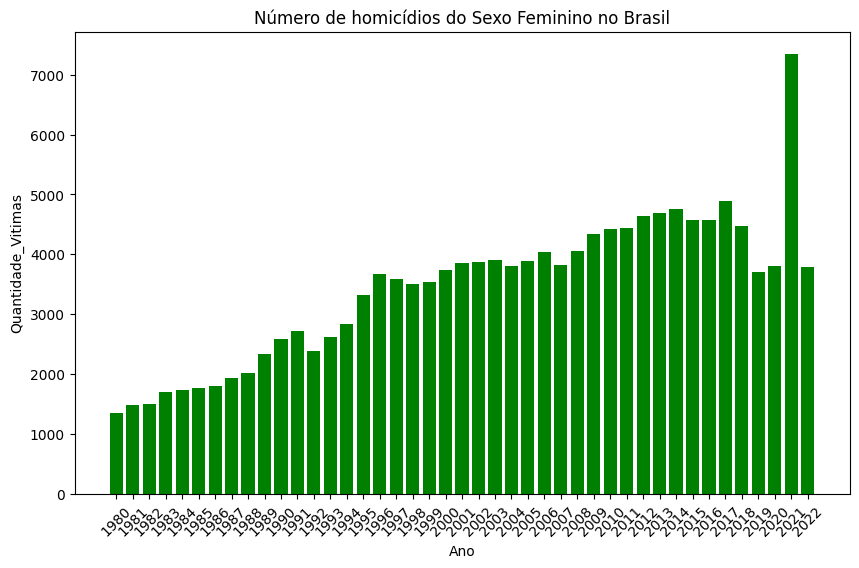

In [145]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(brasil['ano'], brasil['vitimas(quantidade)'], color='green')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Número de homicídios do Sexo Feminino no Brasil')

#Ajustando o range das barras.
ax.set_xticks(range(1980, 2023))
ax.set_xticklabels(range(1980, 2023), rotation=45)

plt.show()

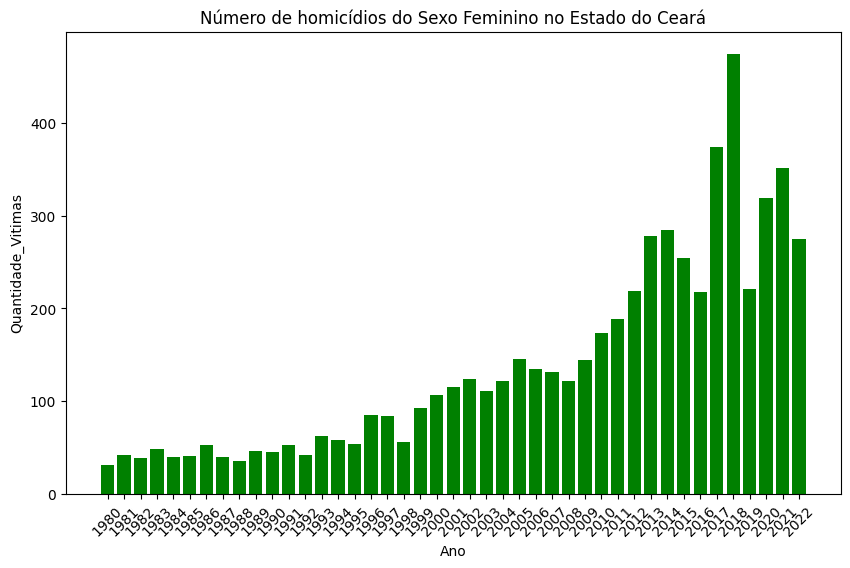

In [163]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ceara['ano'], ceara['vitimas(quantidade)'], color='green')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Número de homicídios do Sexo Feminino no Estado do Ceará')

#Ajustando o range das barras.
ax.set_xticks(range(1980, 2023))
ax.set_xticklabels(range(1980, 2023), rotation=45)

plt.show()

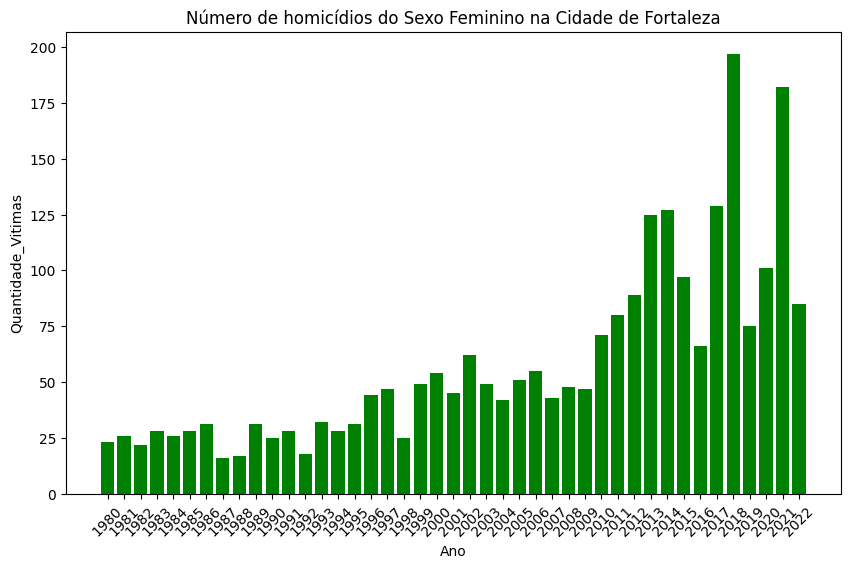

In [164]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fortaleza['ano'], fortaleza['vitimas(quantidade)'], color='green')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Número de homicídios do Sexo Feminino na Cidade de Fortaleza')

#Ajustando o range das barras.
ax.set_xticks(range(1980, 2023))
ax.set_xticklabels(range(1980, 2023), rotation=45)

plt.show()

In [168]:
regional = new_df[new_df['regiao'] == 'Estados']
estados_2022 = regional[regional['ano'] == 2022]
estados_2022

,ano,datetime,cod_territorial,regiao,sigla,estado,municipio,vitimas(quantidade)
137676,2022,2022-01-01 03:00:00+00:00,16,Estados,AP,Amapá,None,16
137716,2022,2022-01-01 03:00:00+00:00,12,Estados,AC,Acre,None,21
137751,2022,2022-01-01 03:00:00+00:00,17,Estados,TO,Tocantins,None,30
137756,2022,2022-01-01 03:00:00+00:00,14,Estados,RR,Roraima,None,31
137771,2022,2022-01-01 03:00:00+00:00,53,Estados,DF,Distrito Federal,None,35
137777,2022,2022-01-01 03:00:00+00:00,28,Estados,SE,Sergipe,None,36
137808,2022,2022-01-01 03:00:00+00:00,11,Estados,RO,Rondônia,None,65
137809,2022,2022-01-01 03:00:00+00:00,22,Estados,PI,Piauí,None,66
137813,2022,2022-01-01 03:00:00+00:00,24,Estados,RN,Rio Grande do Norte,None,71
137814,2022,2022-01-01 03:00:00+00:00,50,Estados,MS,Mato Grosso do Sul,None,71


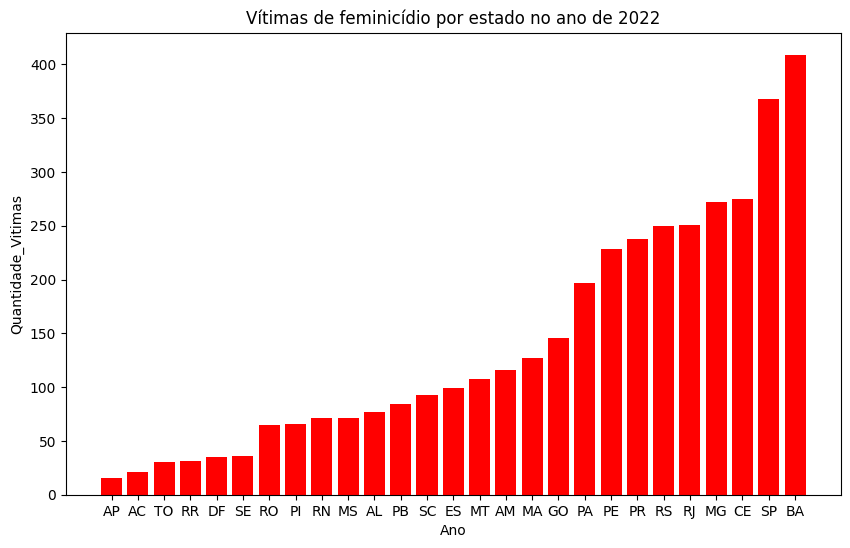

In [171]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(estados_2022['sigla'], estados_2022['vitimas(quantidade)'], color='red')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Vítimas de feminicídio por estado no ano de 2022')


plt.show()

In [183]:
new_df.sample(20)

,ano,datetime,cod_territorial,regiao,sigla,estado,municipio,vitimas(quantidade)
80103,2000,2000-01-01 02:00:00+00:00,412850,AMC 91-00,None,None,None,1
60380,1996,1996-01-01 02:00:00+00:00,2306900,Municípios,None,None,Jaguaribe,1
94178,2002,2002-01-01 02:00:00+00:00,320520,AMC 60-00,None,None,None,15
67268,1997,1997-01-01 02:00:00+00:00,4318309,Municípios,None,None,São Gabriel,3
8550,1982,1982-01-01 02:00:00+00:00,29AMC2097069,AMC 20-00,None,None,None,32
121250,2015,2015-01-01 02:00:00+00:00,31002,Microrregiões,None,None,None,6
61948,1996,1996-01-01 02:00:00+00:00,21AMC7097014,AMC 70-00,None,None,None,3
1963,1980,1980-01-01 02:00:00+00:00,330340,AMC 70-00,None,None,None,3
17845,1985,1985-01-01 02:00:00+00:00,352590,AMC 70-00,None,None,None,5
39243,1991,1991-01-01 02:00:00+00:00,52AMC4097012,AMC 40-00,None,None,None,8


In [200]:
# As 30 cidades com mais feminicídios em 2022
distrital_2022_top30 = (
    new_df[new_df['regiao'] == 'Municípios']
    .query('ano == 2022')
    .sort_values(by='vitimas(quantidade)', ascending=False)
    .head(30)
    .drop(columns=['ano', 'datetime', 'cod_territorial', 'regiao', 'sigla', 'estado'])
)
distrital_2022_top30

,municipio,vitimas(quantidade)
137823,Fortaleza,85
137819,Salvador,79
137815,Manaus,72
137812,Rio de Janeiro,69
137794,Porto Alegre,49
137793,Recife,48
137780,São Paulo,36
137776,Brasília,35
137769,Curitiba,34
137768,Belo Horizonte,34


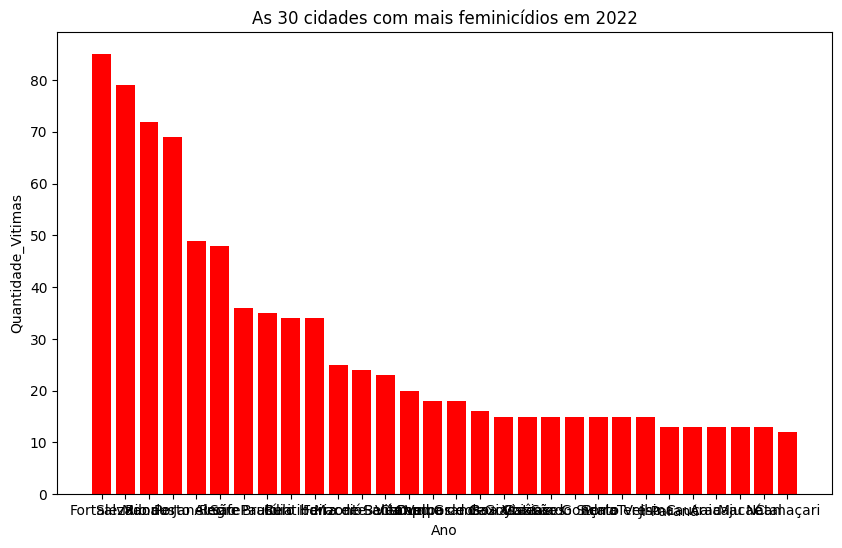

In [199]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(distrital_2022_top30['municipio'], distrital_2022_top30['vitimas(quantidade)'], color='red')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('As 30 cidades com mais feminicídios em 2022')



plt.show()

### Salvando as Tabelas no Catalog do Databriks

In [0]:

df_spark.to_spark().write.format('delta').mode('overwrite').option('overwriteSchema', 'true').saveAsTable('femicide_brasil')



### Realizando Consultas nas Tabelas Criadas com SQL

In [0]:
%sql
SELECT * FROM femicide_states WHERE nome == 'Ceará';

id,Ano,Territorio,sigla,nome,Quantidade_vitimas
23,2002,Estados,CE,Ceará,124
23,2003,Estados,CE,Ceará,111
23,2004,Estados,CE,Ceará,122
23,2005,Estados,CE,Ceará,145
23,2006,Estados,CE,Ceará,135
23,2007,Estados,CE,Ceará,131
23,2008,Estados,CE,Ceará,122
23,2009,Estados,CE,Ceará,144
23,2010,Estados,CE,Ceará,173
23,2011,Estados,CE,Ceará,189


In [0]:
# Exibindo em um dataframe Spark
ceara = _sqldf
ceara.display()

id,Ano,Territorio,sigla,nome,Quantidade_vitimas
23,2002,Estados,CE,Ceará,124
23,2003,Estados,CE,Ceará,111
23,2004,Estados,CE,Ceará,122
23,2005,Estados,CE,Ceará,145
23,2006,Estados,CE,Ceará,135
23,2007,Estados,CE,Ceará,131
23,2008,Estados,CE,Ceará,122
23,2009,Estados,CE,Ceará,144
23,2010,Estados,CE,Ceará,173
23,2011,Estados,CE,Ceará,189


In [0]:
# Convertendo em um dataframe pandas para poder plotar o gráfico
df_ceara = ceara.toPandas()
df_ceara

,id,Ano,Territorio,sigla,nome,Quantidade_vitimas
0,23,2002,Estados,CE,Ceará,124
1,23,2003,Estados,CE,Ceará,111
2,23,2004,Estados,CE,Ceará,122
3,23,2005,Estados,CE,Ceará,145
4,23,2006,Estados,CE,Ceará,135
5,23,2007,Estados,CE,Ceará,131
6,23,2008,Estados,CE,Ceará,122
7,23,2009,Estados,CE,Ceará,144
8,23,2010,Estados,CE,Ceará,173
9,23,2011,Estados,CE,Ceará,189


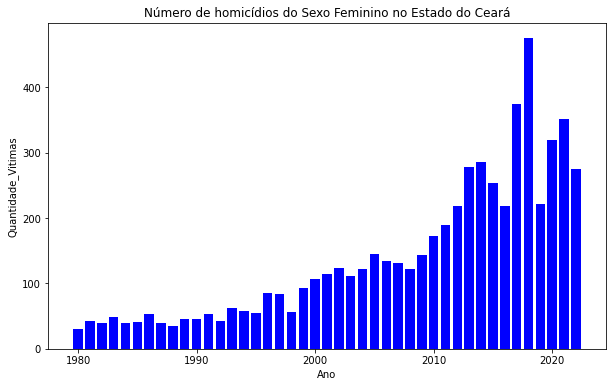

In [0]:

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.bar(df_ceara['Ano'], df_ceara['Quantidade_vitimas'], color='blue')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Número de homicídios do Sexo Feminino no Estado do Ceará')

plt.show()

In [0]:
descricao = df_ceara.describe().reset_index()

In [0]:
descricao

,index,Ano,Quantidade_vitimas
0,count,43.000000,43.000000
1,mean,2001.000000,138.023256
2,std,12.556539,109.139380
3,min,1980.000000,31.000000
4,25%,1990.500000,50.500000
5,50%,2001.000000,111.000000
6,75%,2011.500000,203.500000
7,max,2022.000000,475.000000
